In [17]:
# 인터랙티브 애니메이션의 일괄적 종료를 위한 코드: 서로 다른 코드셀의 인터랙티브셀간에 간섭이 일어나서 가급적 아예 독립적인 노트북에서 실행할 것.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 'fig'는 이전에 plt.subplots()로 생성한 Figure 객체입니다.
# plt.close(fig)

# 만약 열려있는 모든 Figure를 닫고 싶다면:
plt.close('all')

#### 1. Motion in Curve

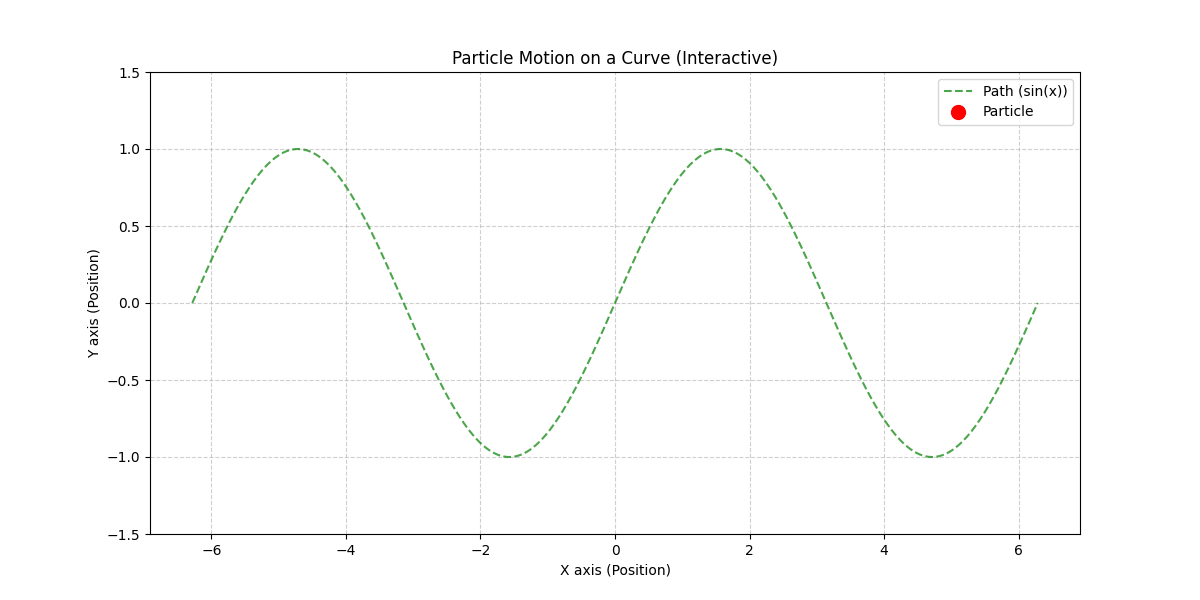

In [8]:
# ==============================================================================
# 단계 0: ipympl 백엔드 설정
# ------------------------------------------------------------------------------
# 주피터 노트북 환경에서 대화형(interactive) 플롯을 위한 매직 커맨드입니다.
# ==============================================================================
%matplotlib widget

# ==============================================================================
# 단계 1: 라이브러리 임포트
# ------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ==============================================================================
# 단계 2: 공간 및 경로 정의 (좌표 생성)
# ------------------------------------------------------------------------------
# 입자가 움직일 경로(곡선)를 정의하기 위한 x좌표를 생성합니다.
x_path = np.linspace(-2 * np.pi, 2 * np.pi, 400)
# 사인 함수를 사용하여 y좌표를 계산하여 곡선 경로를 정의합니다.
y_path = np.sin(x_path)

# ==============================================================================
# 단계 3: 초기 상태 정의
# ------------------------------------------------------------------------------
# 애니메이션 시작 시 입자의 초기 위치를 정의합니다.
initial_particle_x = x_path[0]
initial_particle_y = y_path[0]

# ==============================================================================
# 단계 4: 시각화 준비 (Figure 및 Axes 객체 생성)
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 6))
# y축의 범위를 설정하여 입자가 화면 밖으로 나가지 않도록 합니다.
ax.set_ylim(-1.5, 1.5)

# ==============================================================================
# 단계 5: 초기 프레임 시각화 (정적 요소 플로팅)
# ------------------------------------------------------------------------------
# 입자가 움직일 전체 경로(사인 곡선)를 먼저 그립니다.
ax.plot(x_path, y_path, 'g--', label='Path (sin(x))', alpha=0.7)

# 입자를 나타내는 점(marker)을 초기 위치에 그립니다.
# 이 'particle' 객체는 애니메이션의 각 프레임에서 위치가 업데이트됩니다.
# '[]'로 초기화하고, update 함수에서 첫 위치를 설정합니다.
particle, = ax.plot([], [], 'ro', markersize=10, label='Particle')

# ==============================================================================
# 단계 6: 그래프 꾸미기 (레이블, 타이틀, 그리드 등)
# ------------------------------------------------------------------------------
ax.set_xlabel('X axis (Position)')
ax.set_ylabel('Y axis (Position)')
ax.set_title('Particle Motion on a Curve (Interactive)')
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()

# ==============================================================================
# 단계 7: 애니메이션 정의 및 최종 출력
# ------------------------------------------------------------------------------
# 각 프레임마다 호출되어 입자의 위치를 업데이트하는 함수
def update(frame):
    # 'frame'은 0부터 시작하는 프레임 번호입니다.
    # 이 번호를 인덱스로 사용하여 경로 상의 다음 위치를 가져옵니다.
    # len(x_path)로 나누어 입자가 계속 순환하도록 합니다.
    current_index = frame % len(x_path)
    
    # 입자의 새로운 x, y 위치를 설정합니다.
    new_x = x_path[current_index]
    new_y = y_path[current_index]
    
    # particle 객체의 데이터를 새로운 위치로 업데이트합니다.
    particle.set_data([new_x], [new_y])
    
    return particle,

# FuncAnimation 객체 생성
# frames: 전체 애니메이션 길이 (프레임 수)
# interval: 각 프레임 사이의 지연 시간 (밀리초)
ani = FuncAnimation(fig, update, frames=len(x_path), interval=25, blit=True)

# plt.show()를 호출하여 ipympl 백엔드가 애니메이션 위젯을 표시합니다.
plt.show()

#### 2. Motion of Particle in Surface : Sphere

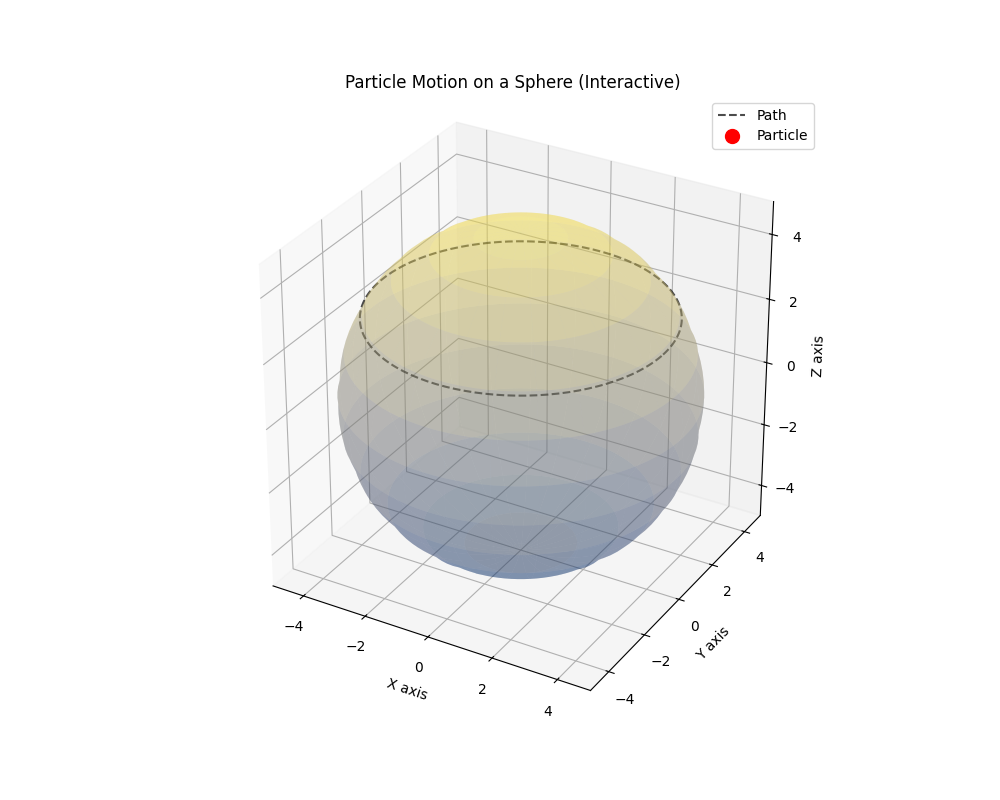

In [21]:
# ==============================================================================
# 단계 0: ipympl 백엔드 설정
# ------------------------------------------------------------------------------
# 주피터 노트북 환경에서 대화형(interactive) 플롯을 위한 매직 커맨드입니다.
# ==============================================================================
%matplotlib widget

# ==============================================================================
# 단계 1: 라이브러리 임포트
# ------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# 3D 축을 사용하기 위해 Axes3D를 임포트합니다.
from mpl_toolkits.mplot3d import Axes3D

# ==============================================================================
# 단계 2: 공간 및 곡면 정의 (구면 좌표 그리드 생성)
# ------------------------------------------------------------------------------
# 3차원 구면을 정의하기 위해 구면 좌표계(u: 경도, v: 위도)를 사용합니다.
sphere_radius = 5.0
u = np.linspace(0, 2 * np.pi, 100) # 경도 (Longitude)
v = np.linspace(0, np.pi, 50)   # 위도 (Latitude)

# 구면 좌표를 데카르트 좌표(x, y, z)로 변환하여 구면을 생성합니다.
X = sphere_radius * np.outer(np.cos(u), np.sin(v))
Y = sphere_radius * np.outer(np.sin(u), np.sin(v))
Z = sphere_radius * np.outer(np.ones(np.size(u)), np.cos(v))

# ==============================================================================
# 단계 3: 입자의 경로 정의
# ------------------------------------------------------------------------------
# 입자가 구면 위에서 원형 경로를 따라 움직이도록 설정합니다.
# 특정 위도(polar angle)를 고정하고 경도를 0에서 2*pi까지 변화시킵니다.
num_frames = 200
t = np.linspace(0, 2 * np.pi, num_frames) # 경로 파라미터 (시간 또는 경도 각도)

# 입자가 움직일 위도를 설정합니다 (pi/3는 북극점에서 60도 떨어진 지점).
particle_latitude_angle = np.pi / 3

# 시간에 따른 입자의 3D 데카르트 좌표를 계산합니다.
particle_path_x = sphere_radius * np.sin(particle_latitude_angle) * np.cos(t)
particle_path_y = sphere_radius * np.sin(particle_latitude_angle) * np.sin(t)
# Z 좌표는 위도가 고정되어 있으므로 일정합니다.
particle_path_z = sphere_radius * np.cos(particle_latitude_angle) * np.ones_like(t)

# ==============================================================================
# 단계 4: 시각화 준비 (Figure 및 3D Axes 객체 생성)
# ------------------------------------------------------------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# 축의 비율을 동일하게 설정하여 구가 찌그러지지 않게 합니다.
ax.set_box_aspect([1, 1, 1])

# ==============================================================================
# 단계 5: 초기 프레임 시각화 (정적 요소 플로팅)
# ------------------------------------------------------------------------------
# 입자가 움직일 전체 구면을 먼저 그립니다.
# alpha 값을 주어 반투명하게 만들어 입자와 경로가 잘 보이도록 합니다.
ax.plot_surface(X, Y, Z, cmap='cividis', alpha=0.3, rstride=4, cstride=4)

# 입자가 움직일 전체 경로를 점선으로 미리 그려줍니다.
ax.plot(particle_path_x, particle_path_y, particle_path_z, 'k--', alpha=0.7, label='Path')

# 입자를 나타내는 점(marker)을 초기화합니다.
particle, = ax.plot([], [], [], 'ro', markersize=10, label='Particle')

# ==============================================================================
# 단계 6: 그래프 꾸미기 (레이블, 타이틀, 축 범위 등)
# ------------------------------------------------------------------------------
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Particle Motion on a Sphere (Interactive)')

# 축 범위를 구의 반지름에 맞게 설정합니다.
ax.set_xlim([-sphere_radius, sphere_radius])
ax.set_ylim([-sphere_radius, sphere_radius])
ax.set_zlim([-sphere_radius, sphere_radius])
ax.legend()

# ==============================================================================
# 단계 7: 애니메이션 정의 및 최종 출력
# ------------------------------------------------------------------------------
# 각 프레임마다 호출되어 입자의 위치를 업데이트하는 함수
def update(frame):
    # 'frame' 번호에 해당하는 경로 상의 위치를 가져옵니다.
    new_x = particle_path_x[frame]
    new_y = particle_path_y[frame]
    new_z = particle_path_z[frame]

    # 3D plot의 데이터를 업데이트합니다.
    # set_data()로 x, y를, set_3d_properties()로 z를 설정합니다.
    particle.set_data([new_x], [new_y])
    particle.set_3d_properties([new_z])
    
    return particle,

# FuncAnimation 객체 생성
ani = FuncAnimation(fig, update, frames=num_frames, interval=50, blit=True)

# plt.show()를 호출하여 ipympl 백엔드가 애니메이션 위젯을 표시합니다.
plt.show()

#### 2. Motion of Particle in Surface : sin(sqrt(x^2+y^2))

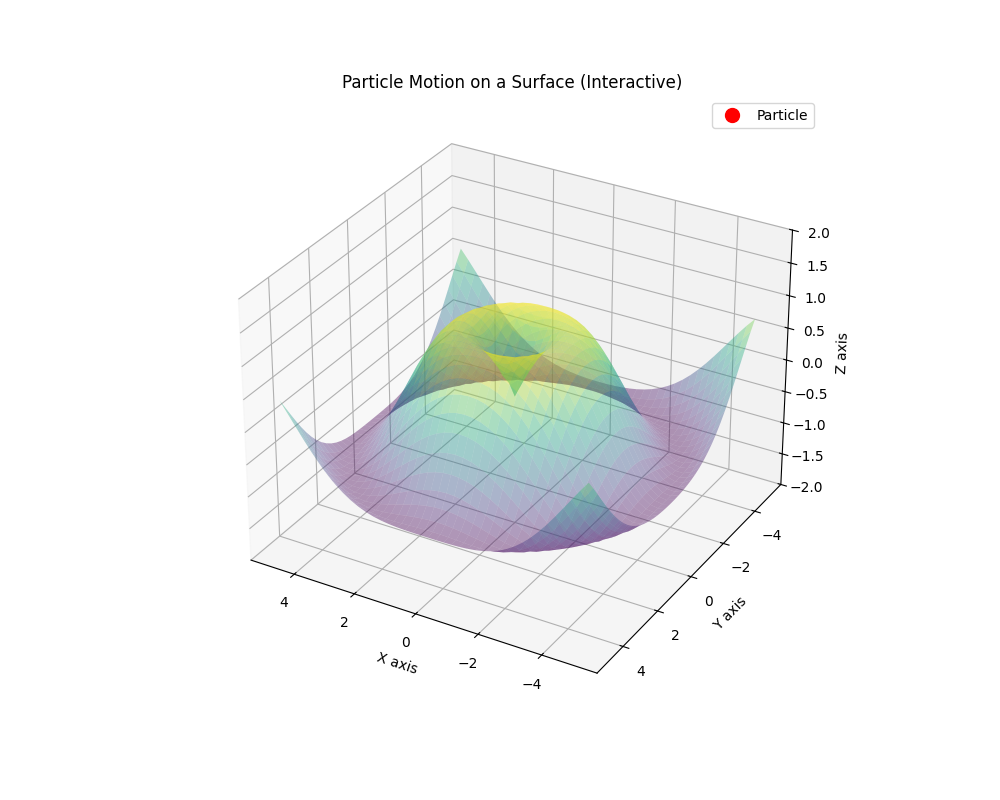

In [4]:
# ==============================================================================
# 단계 0: ipympl 백엔드 설정
# ------------------------------------------------------------------------------
# 주피터 노트북 환경에서 대화형(interactive) 플롯을 위한 매직 커맨드입니다.
# ==============================================================================
%matplotlib widget

# ==============================================================================
# 단계 1: 라이브러리 임포트
# ------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# 3D 축을 사용하기 위해 Axes3D를 임포트합니다.
from mpl_toolkits.mplot3d import Axes3D

# ==============================================================================
# 단계 2: 공간 및 곡면 정의 (좌표 그리드 생성)
# ------------------------------------------------------------------------------
# 3차원 곡면을 정의하기 위해 X-Y 평면의 그리드를 생성합니다.
x_grid = np.arange(-5, 5, 0.25)
y_grid = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x_grid, y_grid)
R = np.sqrt(X**2 + Y**2)
# Z 좌표는 X, Y에 대한 함수로 정의하여 곡면을 만듭니다.
Z = np.sin(R)

# ==============================================================================
# 단계 3: 입자의 경로 정의
# ------------------------------------------------------------------------------
# 입자가 움직일 경로를 시간(t)에 대한 함수로 정의합니다.
# 여기서는 X-Y 평면에서 원형 경로를 따라 움직이도록 설정합니다.
t = np.linspace(0, 2 * np.pi, 200)
radius = 4.0
particle_path_x = radius * np.cos(t)
particle_path_y = radius * np.sin(t)
# 입자의 Z 좌표는 곡면 함수에 X, Y 경로를 대입하여 계산합니다.
particle_path_z = np.sin(np.sqrt(particle_path_x**2 + particle_path_y**2))

# ==============================================================================
# 단계 4: 시각화 준비 (Figure 및 3D Axes 객체 생성)
# ------------------------------------------------------------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# 시야각을 조절하여 곡면이 잘 보이도록 합니다.
ax.view_init(elev=30., azim=120)

# ==============================================================================
# 단계 5: 초기 프레임 시각화 (정적 요소 플로팅)
# ------------------------------------------------------------------------------
# 입자가 움직일 전체 곡면을 먼저 그립니다.
# alpha 값을 주어 반투명하게 만들어 입자가 잘 보이도록 합니다.
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.4, rstride=1, cstride=1)

# 입자를 나타내는 점(marker)을 초기화합니다.
particle, = ax.plot([], [], [], 'ro', markersize=10, label='Particle')

# ==============================================================================
# 단계 6: 그래프 꾸미기 (레이블, 타이틀, 축 범위 등)
# ------------------------------------------------------------------------------
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Particle Motion on a Surface (Interactive)')
ax.set_zlim(-2, 2) # Z축 범위를 조절하여 보기 좋게 만듭니다.
ax.legend()

# ==============================================================================
# 단계 7: 애니메이션 정의 및 최종 출력
# ------------------------------------------------------------------------------
# 각 프레임마다 호출되어 입자의 위치를 업데이트하는 함수
def update(frame):
    # 'frame' 번호에 해당하는 경로 상의 위치를 가져옵니다.
    new_x = particle_path_x[frame]
    new_y = particle_path_y[frame]
    new_z = particle_path_z[frame]

    # 3D plot의 데이터를 업데이트합니다.
    # set_data()로 x, y를, set_3d_properties()로 z를 설정합니다.
    particle.set_data([new_x], [new_y])
    particle.set_3d_properties([new_z])
    
    return particle,

# FuncAnimation 객체 생성
ani = FuncAnimation(fig, update, frames=len(t), interval=50, blit=True)

# plt.show()를 호출하여 ipympl 백엔드가 애니메이션 위젯을 표시합니다.
plt.show()

#### 2. Motion of Vector in Surface(Sphere): Connection

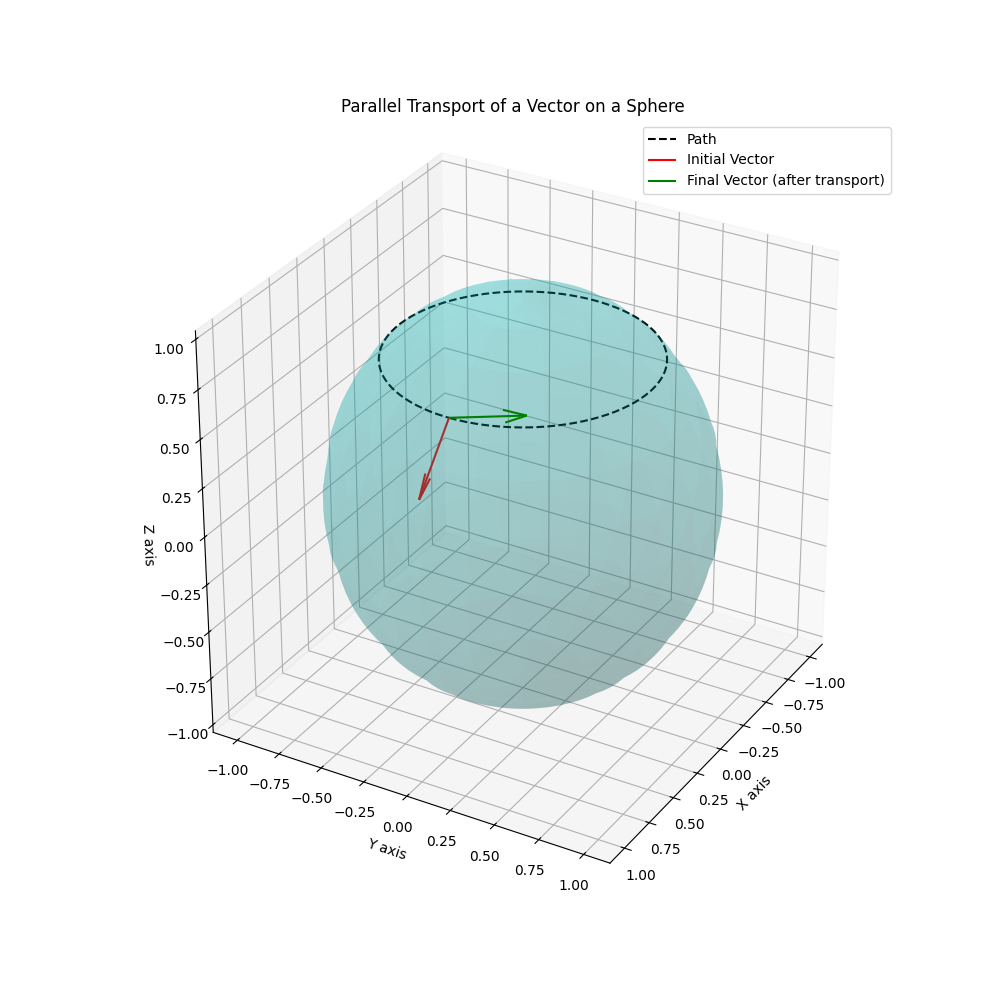

In [9]:
# ==============================================================================
# 단계 0: ipympl 백엔드 설정
# ------------------------------------------------------------------------------
# 주피터 노트북 환경에서 대화형(interactive) 플롯을 위한 매직 커맨드입니다.
# ==============================================================================
%matplotlib widget

# ==============================================================================
# 단계 1: 라이브러리 임포트
# ------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# 3D 축을 사용하기 위해 Axes3D를 임포트합니다.
from mpl_toolkits.mplot3d import Axes3D

# ==============================================================================
# 단계 2: 공간 및 경로 정의 (구면과 경로 생성)
# ------------------------------------------------------------------------------
# 구의 반지름을 1로 설정 (단위 구)
radius = 1.0
# 애니메이션의 프레임(경로를 나눌 지점) 수
num_frames = 200

# 1. 구면을 그리기 위한 좌표 그리드 생성
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 50)
sphere_x = radius * np.outer(np.cos(u), np.sin(v))
sphere_y = radius * np.outer(np.sin(u), np.sin(v))
sphere_z = radius * np.outer(np.ones(np.size(u)), np.cos(v))

# 2. 평행이동을 수행할 경로(위도선) 정의
# 북극점(phi=0)에서 남극점(phi=pi) 사이의 위도를 설정 (예: 북위 45도 지점)
path_phi = np.pi / 4
# 경도(theta)는 0에서 2*pi까지 변합니다.
path_theta = np.linspace(0, 2 * np.pi, num_frames)

# 경로의 3D 데카르트 좌표 계산
path_x = radius * np.cos(path_theta) * np.sin(path_phi)
path_y = radius * np.sin(path_theta) * np.sin(path_phi)
path_z = radius * np.ones_like(path_theta) * np.cos(path_phi)

# ==============================================================================
# 단계 3: 초기 벡터 정의
# ------------------------------------------------------------------------------
# 경로의 시작점 (t=0)
start_point = np.array([path_x[0], path_y[0], path_z[0]])

# 시작점에서 구면에 접하는 벡터(tangent vector)를 정의합니다.
# 여기서는 '남쪽 방향'(경선 방향)을 가리키는 벡터로 설정합니다.
initial_vector = np.array([np.cos(path_theta[0]) * np.cos(path_phi), 
                           np.sin(path_theta[0]) * np.cos(path_phi), 
                           -np.sin(path_phi)])
initial_vector /= np.linalg.norm(initial_vector) # 정규화

# ==============================================================================
# 단계 4: 평행이동 시뮬레이션 (벡터 궤적 계산)
# ------------------------------------------------------------------------------
# 각 프레임에서의 벡터를 저장할 배열
transported_vectors = np.zeros((num_frames, 3))
transported_vectors[0] = initial_vector

# 한 스텝씩 이동하며 벡터를 평행이동 시킵니다.
# 알고리즘: 현재 벡터를 (현재 지점 -> 다음 지점)을 축으로 회전시켜 다음 벡터를 얻음
for i in range(num_frames - 1):
    # 현재 위치 벡터(P_i)와 다음 위치 벡터(P_{i+1})
    p_current = np.array([path_x[i], path_y[i], path_z[i]])
    p_next = np.array([path_x[i+1], path_y[i+1], path_z[i+1]])
    
    # 두 위치 벡터에 수직인 회전축 계산
    rotation_axis = np.cross(p_current, p_next)
    rotation_axis /= np.linalg.norm(rotation_axis)
    
    # 두 위치 벡터 사이의 각도(회전각) 계산
    rotation_angle = np.arccos(np.dot(p_current, p_next) / (radius**2))
    
    # 로드리게스 회전 공식(Rodrigues' rotation formula)을 사용하여 현재 벡터를 회전
    v = transported_vectors[i]
    k = rotation_axis
    v_rotated = (v * np.cos(rotation_angle) + 
                 np.cross(k, v) * np.sin(rotation_angle) + 
                 k * np.dot(k, v) * (1 - np.cos(rotation_angle)))
    
    transported_vectors[i+1] = v_rotated

# ==============================================================================
# 단계 5: 시각화 준비 (Figure 및 3D Axes 객체 생성)
# ------------------------------------------------------------------------------
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
# 축의 비율을 동일하게 맞춰 구가 찌그러져 보이지 않게 함
ax.set_box_aspect([1, 1, 1])

# ==============================================================================
# 단계 6: 초기 프레임 시각화 (정적 요소 플로팅)
# ------------------------------------------------------------------------------
# 1. 반투명한 구면 그리기
ax.plot_surface(sphere_x, sphere_y, sphere_z, color='c', alpha=0.2, rstride=4, cstride=4)

# 2. 벡터가 움직일 경로 그리기
ax.plot(path_x, path_y, path_z, 'k--', label='Path')

# 3. 초기 벡터(붉은색) 그리기
ax.quiver(start_point[0], start_point[1], start_point[2],
          initial_vector[0], initial_vector[1], initial_vector[2],
          color='red', length=0.4, normalize=True, label='Initial Vector')

# 4. 평행이동 후 최종 벡터(초록색) 그리기
final_vector = transported_vectors[-1]
ax.quiver(start_point[0], start_point[1], start_point[2],
          final_vector[0], final_vector[1], final_vector[2],
          color='green', length=0.4, normalize=True, label='Final Vector (after transport)')

# 5. 애니메이션에서 업데이트될 벡터 객체 초기화 (처음에는 보이지 않음)
animated_quiver = ax.quiver([], [], [], [], [], [], color='blue', length=0.4, normalize=True)

# ==============================================================================
# 단계 7: 그래프 꾸미기 (레이블, 타이틀, 시야각 등)
# ------------------------------------------------------------------------------
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Parallel Transport of a Vector on a Sphere')
ax.legend()
ax.view_init(elev=30, azim=30) # 시야각 조절

# ==============================================================================
# 단계 8: 애니메이션 정의 및 최종 출력
# ------------------------------------------------------------------------------
# FuncAnimation은 업데이트할 객체를 전역 또는 nonlocal로 참조해야 할 수 있습니다.
# 이를 관리하기 위한 리스트를 사용합니다.
quiver_container = [animated_quiver]

def update(frame):
    # 이전 프레임의 quiver 객체를 제거합니다.
    if quiver_container:
        quiver_container[0].remove()
        
    # 현재 프레임의 위치와 벡터
    current_pos = [path_x[frame], path_y[frame], path_z[frame]]
    current_vec = transported_vectors[frame]
    
    # 현재 위치에 새로운 quiver 객체를 그립니다.
    q = ax.quiver(current_pos[0], current_pos[1], current_pos[2],
                  current_vec[0], current_vec[1], current_vec[2],
                  color='blue', length=0.4, normalize=True)
    
    # 컨테이너에 새로운 객체를 저장합니다.
    quiver_container[0] = q
    
    return quiver_container

# FuncAnimation 객체 생성
# blit=False는 3D 환경 및 객체 제거/재생성 방식에 더 안정적입니다.
ani = FuncAnimation(fig, update, frames=num_frames, interval=50, blit=False)

# plt.show()를 호출하여 ipympl 백엔드가 애니메이션 위젯을 표시합니다.
plt.show()

#### 3. Motion in Curve : Langevin

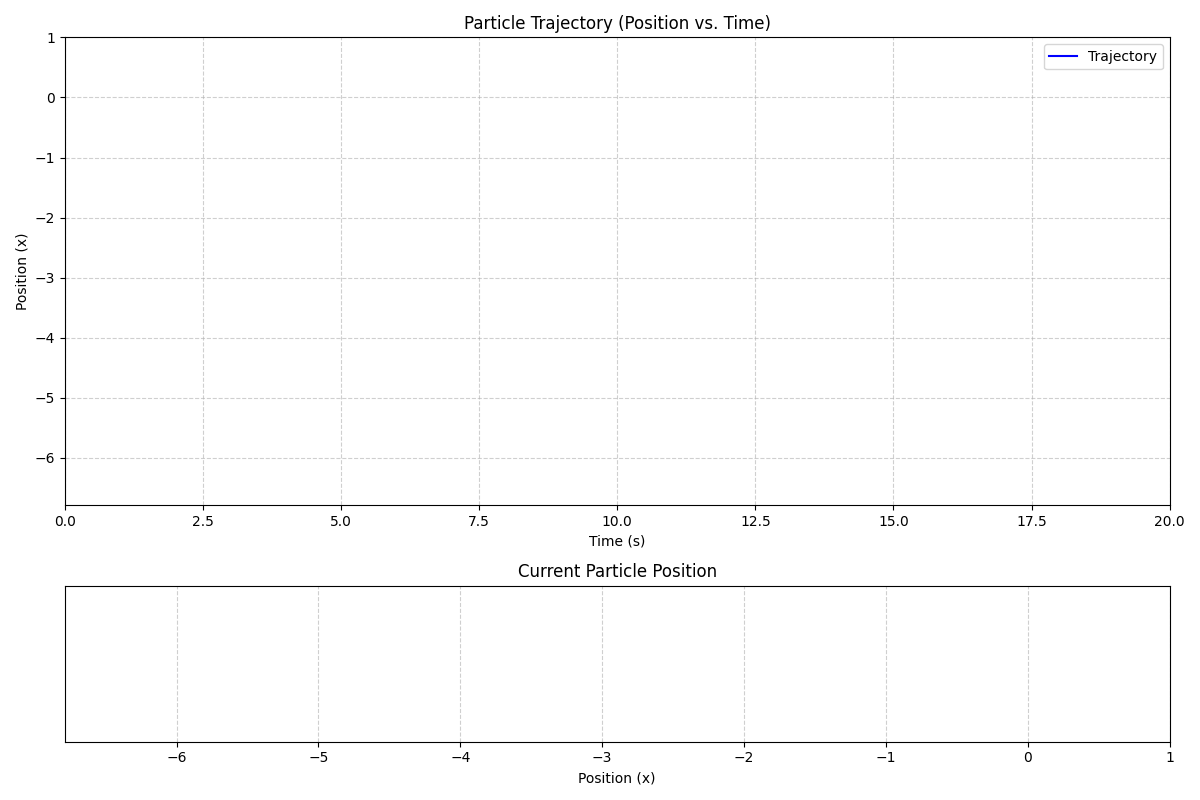

In [16]:
# ==============================================================================
# 단계 0: ipympl 백엔드 설정
# ------------------------------------------------------------------------------
# 주피터 노트북 환경에서 대화형(interactive) 플롯을 위한 매직 커맨드입니다.
# ==============================================================================
%matplotlib widget

# ==============================================================================
# 단계 1: 라이브러리 임포트
# ------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# ==============================================================================
# 단계 2: 시뮬레이션 파라미터 및 초기 조건 정의
# ------------------------------------------------------------------------------
# 물리적 파라미터 설정
m = 1.0  # 입자의 질량 (mass)
gamma = 0.5  # 마찰 계수 (friction coefficient)
k_B_T = 1.0  # 볼츠만 상수 * 절대 온도 (thermal energy)

# 시뮬레이션 시간 설정
dt = 0.01  # 시간 간격 (time step)
num_steps = 2000  # 전체 시뮬레이션 스텝 수
t = np.arange(0, num_steps * dt, dt) # 전체 시간 배열

# 초기 조건
x0 = 0.0  # 초기 위치
v0 = 0.0  # 초기 속도

# ==============================================================================
# 단계 3: 시뮬레이션 데이터 생성 (궤적 계산)
# ------------------------------------------------------------------------------
# 입자의 위치와 속도를 저장할 배열을 초기화합니다.
positions = np.zeros(num_steps)
velocities = np.zeros(num_steps)
positions[0] = x0
velocities[0] = v0

# 무작위 힘의 크기를 결정하는 표준편차를 계산합니다. (Fluctuation-Dissipation Theorem)
random_force_sigma = np.sqrt(2 * gamma * k_B_T / dt)

# 오일러-마루야마 방법을 사용하여 시간 스텝별로 궤적을 계산합니다.
for i in range(num_steps - 1):
    # 현재 속도와 위치
    v = velocities[i]
    x = positions[i]

    # 힘 계산
    drag_force = -gamma * v  # 마찰력
    random_force = np.random.normal(0, random_force_sigma)  # 무작위 힘
    total_force = drag_force + random_force

    # 다음 스텝의 속도와 위치 업데이트
    v_new = v + (total_force / m) * dt
    x_new = x + v_new * dt

    velocities[i+1] = v_new
    positions[i+1] = x_new

# ==============================================================================
# 단계 4: 시각화 준비 (Figure 및 Axes 객체 생성)
# ------------------------------------------------------------------------------
# 2개의 서브플롯을 생성합니다: 하나는 궤적, 다른 하나는 현재 입자 위치용
fig, (ax1, ax2) = plt.subplots(
    2, 1,
    figsize=(12, 8),
    gridspec_kw={'height_ratios': [3, 1]} # 위쪽 플롯을 더 크게 만듭니다.
)

# 궤적 플롯(ax1)의 축 범위 설정
ax1.set_xlim(0, num_steps * dt)
ax1.set_ylim(np.min(positions) - 1, np.max(positions) + 1)

# 입자 위치 플롯(ax2)의 축 범위 설정
ax2.set_xlim(np.min(positions) - 1, np.max(positions) + 1)
ax2.set_ylim(-1, 1) # y축은 의미가 없으므로 고정
ax2.set_yticks([]) # y축 눈금 제거

# ==============================================================================
# 단계 5: 초기 프레임 시각화 (애니메이션 요소 플로팅)
# ------------------------------------------------------------------------------
# 궤적을 그릴 선 객체 (처음에는 비어 있음)
trajectory_line, = ax1.plot([], [], 'b-', lw=1.5, label='Trajectory')
# 궤적 위에서 현재 시간을 나타낼 점 객체
current_time_dot, = ax1.plot([], [], 'ro', markersize=8)

# 현재 입자의 위치를 나타낼 점 객체
particle_point, = ax2.plot([], [], 'ro', markersize=15, label='Particle')

# ==============================================================================
# 단계 6: 그래프 꾸미기 (레이블, 타이틀, 그리드 등)
# ------------------------------------------------------------------------------
ax1.set_title('Particle Trajectory (Position vs. Time)')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Position (x)')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend()

ax2.set_title('Current Particle Position')
ax2.set_xlabel('Position (x)')
ax2.grid(True, linestyle='--', alpha=0.6)

fig.tight_layout() # 플롯 간 간격 자동 조절

# ==============================================================================
# 단계 7: 애니메이션 정의 및 최종 출력
# ------------------------------------------------------------------------------
# 각 프레임마다 호출되어 그래프를 업데이트하는 함수
def update(frame):
    # 궤적 라인을 프레임까지의 데이터로 업데이트합니다.
    trajectory_line.set_data(t[:frame+1], positions[:frame+1])
    
    # 궤적 위의 현재 시간 점을 업데이트합니다.
    # 단일 값을 리스트로 감싸서 전달합니다: [t[frame]], [positions[frame]]
    current_time_dot.set_data([t[frame]], [positions[frame]])
    
    # 아래쪽 플롯의 입자 위치를 업데이트합니다.
    # 단일 값을 리스트로 감싸서 전달합니다: [positions[frame]], [0]
    particle_point.set_data([positions[frame]], [0])
    
    return trajectory_line, current_time_dot, particle_point

# FuncAnimation 객체 생성
# repeat=False로 설정하여 애니메이션이 한 번만 실행되도록 합니다.
ani = FuncAnimation(
    fig,
    update,
    frames=num_steps,
    interval=20, # 20ms 간격
    blit=True,
    repeat=False
)

# plt.show()를 호출하여 ipympl 백엔드가 애니메이션 위젯을 표시합니다.
plt.show()